In [202]:
import pandas as pd
import matplotlib.pyplot as plt


In [203]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

In [204]:
comm_sales_k = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem1', nrows=10)
comm_sales_k

,No of Commercials (x),Sales Volume (K$) (y)
0,2,50
1,5,57
2,1,41
3,3,54
4,4,54
5,1,38
6,5,63
7,3,48
8,4,59
9,2,46


In [205]:
comm_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   No of Commercials (x)  10 non-null     int64
 1   Sales Volume ($) (y)   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


### 1.	In a Sound and stereo store in Chicago the manager wants to know is there any relationship between the number of weekend television commercials shown and sales at the store at the following week.  The sample data of the store is provided in the spread sheet tab. Use that to solve the below problem

#### 1.	Find the covariance between the variables and tell us is there any relationship between them

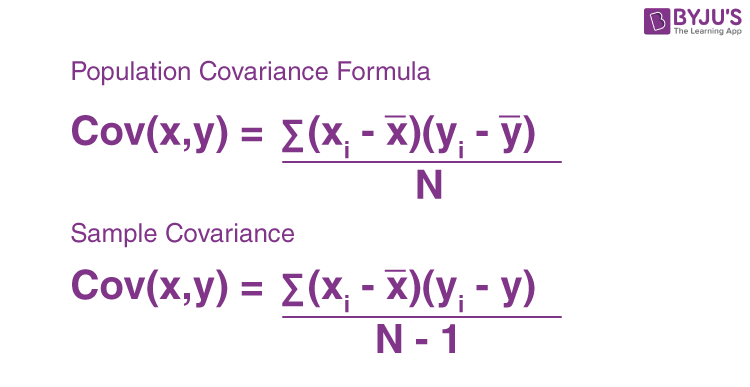

In [206]:
# Higher the CO-VARIANCE stronger the relation between them
# Higher the VARIANCE indicates the stock is risky

# Pandas dataframe.cov() is used to compute pairwise covariance of columns.
# If some of the cells in a column contain NaN value, then it is ignored.

# Variance refers to the spread of a data set around its mean value, 
# while a covariance refers to the measure of the directional relationship between two random variables.

In [207]:
def covariance(x,y,n):
    return ((x-x.mean()) * (y-y.mean())).sum() / (n-1)

In [208]:
x_k = comm_sales_k['No of Commercials (x)']
y_k = comm_sales_k['Sales Volume (K$) (y)']
n_k = len(comm_sales)

print(x_k.mean())
print(y_k.mean())
print(n_k)

3.0
51.0
10


In [209]:
covariance(x_k,y_k,n_k)

11.0

In [210]:
comm_sales_k.cov()

,No of Commercials (x),Sales Volume (K$) (y)
No of Commercials (x),2.222,11.000
Sales Volume (K$) (y),11.000,62.889


#### 2.	Is the Sales and number of commercials correlated?  If yes - Positive/ Negative 

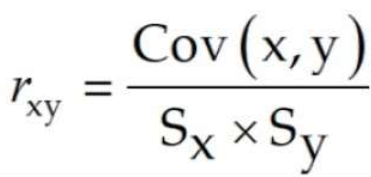

In [211]:
def correlation(x,y,n):
    return covariance(x,y,n) / (x.std() * y.std())

In [212]:
correlation(x_k, y_k, n_k)

0.9304905807411791

In [213]:
comm_sales_k.corr()

,No of Commercials (x),Sales Volume (K$) (y)
No of Commercials (x),1.000,0.930
Sales Volume (K$) (y),0.930,1.000


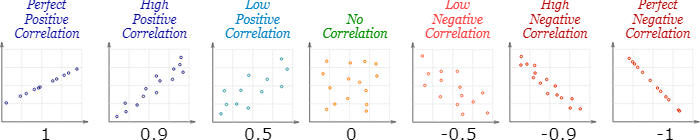

Text(0, 0.5, 'Sales Volume (in K$)')

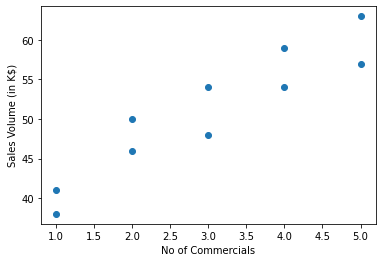

In [214]:
plt.scatter(x_k, y_k)
plt.xlabel('No of Commercials')
plt.ylabel('Sales Volume (in K$)')

### 2.	In the above problem the Manager has been provided the data with the sales amount measured in Kilo $($1000). But now the sales team provides a new data in Tab 2 with the amount in $. Does this unit of measurement impact the covariance and correlation calculated in problem1. The data is in Tab2
###		Calculate the new covariance and correlation and confirm 


In [215]:
# COVARIANCE is DEPENDENT on the scale of the values ===> Corresponds to Directional Relationship between variables
# CORRELATION is INDEPENDENT on the scale of values ===> Corresponds to the STRENGTH between variables

In [216]:
comm_sales = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem2', nrows=10)

In [217]:
x = comm_sales['No of Commercials (x)']
y = comm_sales['Sales Volume ($) (y)']
n = len(comm_sales)

In [218]:
print(covariance(x_k, y_k, n_k))
print(covariance(x, y, n))

11.0
11000.0


In [219]:
print(correlation(x_k,y_k,n_k))
print(correlation(x,y,n))

0.9304905807411791
0.9304905807411791


In [220]:
# NOTES
# =====
# You want to train your model using the columns that has the highest correlation with the label of your dataset

### 3.	The sales report about the pharmaceutical company  in million $ for the 21 states in US has been provided in the spread sheet

#### 1.	Provide the five number summary of the box plot

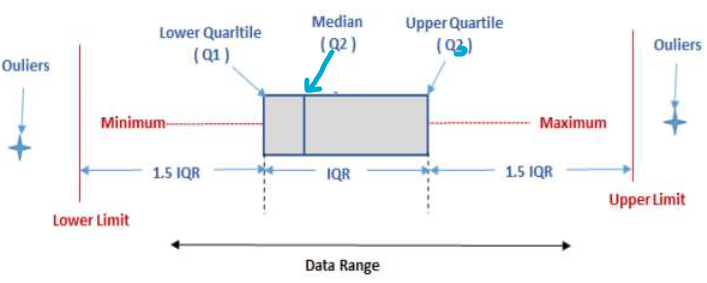

In [221]:
us_sales = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem3')

In [222]:
us_sales

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
7,Ohio,14138
8,Maryland,6452
9,Massachusetts,1850


In [223]:
us_sales.describe(include='all')

,State,Sales
count,21,21.000
unique,21,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,5170.524
std,NaN,3917.733
min,NaN,608.000
25%,NaN,1872.000
50%,NaN,4019.000
75%,NaN,8305.000


<AxesSubplot:>

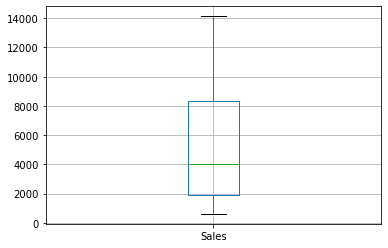

In [224]:
us_sales.boxplot()

#### 2.	Compute the lower and upper limits

In [225]:
import math

In [226]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
# print(IQR)

In [227]:
Q1, Q3, IQR, L, U

(1872.0, 8305.0, 6433.0, -7777, 17954)

#### 3.	Does the data contain any outlier ? 

The data has no outliers. All the values in Sales col are bounded between the Lower and Upper Limits (-7777, 17954)

#### 4.	Ohio state has the highest sales at $$14,138 million. Suppose a data entry error has been made as $ 41,138 million would this been identified as an outlier and corrected

In [228]:
us_sales.loc[us_sales['State']=='Ohio', 'Sales'] = 41138

In [229]:
us_sales.describe(include='all')

,State,Sales
count,21,21.000
unique,21,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,6456.238
std,NaN,8618.300
min,NaN,608.000
25%,NaN,1872.000
50%,NaN,4019.000
75%,NaN,8305.000


<AxesSubplot:>

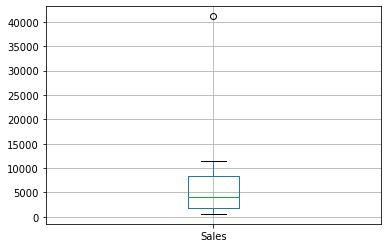

In [230]:
us_sales.boxplot()

In [231]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
Q1, Q3, IQR, L, U

(1872.0, 8305.0, 6433.0, -7777, 17954)

In [232]:
# 41,138 is higher than the upper limit. So, it is an outlier

In [233]:
us_sales[(us_sales['Sales'] < L) | (us_sales['Sales'] > U)]

,State,Sales
7,Ohio,41138


In [236]:
us_sales = us_sales[(us_sales['Sales'] > L) & (us_sales['Sales'] < U)]
us_sales

In [239]:
us_sales.describe(include='all')

,State,Sales
count,20,20.000
unique,20,NaN
top,Arizona,NaN
freq,1,NaN
mean,NaN,4722.150
std,NaN,3422.343
min,NaN,608.000
25%,NaN,1866.500
50%,NaN,3836.000
75%,NaN,7684.750


<AxesSubplot:>

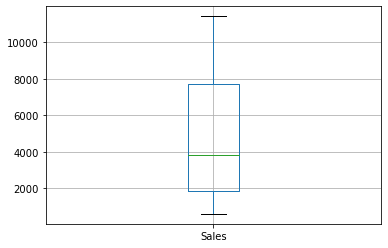

In [237]:
us_sales.boxplot()

In [238]:
Q1 = us_sales['Sales'].quantile(0.25)
Q3 = us_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1
L = math.ceil(Q1 - 1.5 * IQR)
U = math.floor(Q3 + 1.5 * IQR)
Q1, Q3, IQR, L, U

(1866.5, 7684.75, 5818.25, -6860, 16412)

#### 5.	Out of 21 states provided what percentile states are above the Washington 

In [240]:
us_sales

,State,Sales
0,Arizona,8408
1,California,1374
2,Colorado,1872
3,Florida,8879
4,Georgia,2459
5,Kansas,11413
6,Kentucky,608
8,Maryland,6452
9,Massachusetts,1850
10,Michigan,2818


In [262]:
us_sales['Percentile'] = us_sales['Sales'].rank(method='max').apply(lambda x: 100.0*(x-1)/(len(us_sales)-1))
us_sales.sort_values(by='Percentile', ascending=False)

C:\Users\Meaga Varsha R\AppData\Local\Temp\ipykernel_144144\667641032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_sales['Percentile'] = us_sales['Sales'].rank(method='max').apply(lambda x: 100.0*(x-1)/(len(us_sales)-1))


,State,Sales,Percentile
5,Kansas,11413,100.000
12,Missouri,10498,94.737
3,Florida,8879,89.474
0,Arizona,8408,84.211
20,West Virginia,8305,78.947
13,New Jersey,7478,73.684
8,Maryland,6452,68.421
19,Washington,5794,63.158
15,Oklahoma,4341,57.895
14,Louisiana,4019,52.632


#### 6.	What is the 85th percentile ?

In [249]:
us_sales['Sales'].quantile(0.85)

8478.65

### 4.	In an IPL auction a team wants to buy a foreign player who is an all-rounder to balance their side. The team has the budget to spend on only one player and they are looking for a player who could help them in their batting department. The franchise now has the data with the runs scored by player A and player B in their last 20 matches and are confused on their selection
####	Can you help them with your analysis? You know what needs to be done 


In [263]:
player_df = pd.read_excel("Descrip_Stats_problem_data_v1.xlsx", sheet_name='Problem4')
player_df

,Player A,Player B
0,25,0
1,40,25
2,38,22
3,48,38
4,51,25
5,35,45
6,100,51
7,25,60
8,15,62
9,20,93


In [ ]:
# Higher Coefficient of Variation, Higher will be the risk

In [264]:
def coeff_variation(x):
    return x.std() / x.mean() * 100

In [267]:
print(coeff_variation(player_df['Player A']))
print(coeff_variation(player_df['Player B']))
if coeff_variation(player_df['Player A']) > coeff_variation(player_df['Player B']):
    print("Player B")
else:
    print("Player A")

Player A


In [305]:
samples_analysis = []
for _ in range(10):
    sample={}
    sample_df = player_df.sample(n=7)
    sample['MeanA']=sample_df['Player A'].mean()
    sample['MeanB']=sample_df['Player B'].mean()
#     print(sample)
    samples_analysis.append(sample)
samples_analysis_df = pd.DataFrame(samples_analysis)
samples_analysis_df

,MeanA,MeanB
0,31.429,44.857
1,42.857,37.143
2,31.714,21.857
3,33.714,27.429
4,41.429,42.714
5,34.714,38.143
6,28.000,21.000
7,32.857,38.143
8,35.143,25.286
9,33.857,29.571


In [306]:
print("Population Mean")
print("Player A : ", player_df['Player A'].mean())
print("Player B : ", player_df['Player B'].mean())
print("Sample Mean")
print("Player A : ", samples_analysis_df['MeanA'].mean())
print("Player B : ", samples_analysis_df['MeanB'].mean())
print("\nPopulation Std")
print("Player A : ", player_df['Player A'].std())
print("Player B : ", player_df['Player B'].std())
print("Sample Std")
print("Player A : ", samples_analysis_df['MeanA'].std())
print("Player B : ", samples_analysis_df['MeanB'].std())

Population Mean
Player A :  35.0
Player B :  35.0
Sample Mean
Player A :  34.57142857142857
Player B :  32.614285714285714

Population Std
Player A :  20.206825319027338
Player B :  25.296140749966295
Sample Std
Player A :  4.489847453837397
Player B :  8.653849758706151


In [314]:
a=[15,5,20,45,85,65,30,10,20]
sum(a)/len(a)

32.77777777777778